In [1]:
# python required >= 3.5 version
import sys
assert sys.version_info >=(3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import os
import pandas as pd
# make the output satable accros run
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

ROOT = "."
chapter_id = "DNN"
image_path = os.path.join(ROOT,"images",chapter_id)
os.makedirs(image_path,exist_ok=True)

def save_fig(fig_id,tigh_layout=True,fig_extension="png",resolution=300):
    path = os.path.join(image_path,fig_id + "." + fig_extension)
    print("save figure ",fig_id)
    if tigh_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)


In [2]:
from IPython.display import Image
Image(url="images\DNN\Learning_rate scheduling.PNG")

In [3]:
# get dataset fashion_mnist dataset
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()
# standarisasi train data
X_train_full = X_train_full/255.0

# split train data to train and validasi data
X_valid,X_train = X_train_full[:5000], X_train_full[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

# 1. Power scheduling

```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

In [4]:
[i for i in dir(keras.initializers) if not i.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.01,decay=1e-4)
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation="softmax")
])
model_1.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [6]:
history_1 = model_1.fit(X_train,y_train,epochs=25,
                        validation_data=[X_valid,y_valid])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5830 - accuracy: 0.7975 - val_loss: 0.4854 - val_accuracy: 0.8308
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4493 - accuracy: 0.8409 - val_loss: 0.4231 - val_accuracy: 0.8544
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4207 - accuracy: 0.8513 - val_loss: 0.4095 - val_accuracy: 0.8588
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4042 - accuracy: 0.8574 - val_loss: 0.4043 - val_accuracy: 0.8620
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3922 - accuracy: 0.8602 - val_loss: 0.3974 - val_accuracy: 0.8628
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3832 - accuracy: 0.8626 - val_loss: 0.3887 - val_accuracy: 0.8654
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8661 - val_loss: 0.3876 - val_accuracy:

save figure  power_scheduling


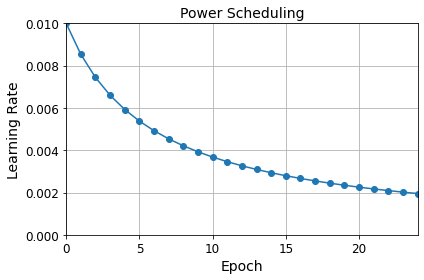

In [7]:
import math
n_epochs=25
learning_rate = 1e-2
decay = 1e-4
batch_size= 32
n_steps_per_epochs = math.ceil(len(X_train)/batch_size)#1719
epochs = np.arange(n_epochs)
lrs = learning_rate / (1+ decay * epochs * n_steps_per_epochs)

plt.plot(epochs,lrs,"o-")
plt.axis([0, n_epochs -1,   0, 1e-2])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
save_fig("power_scheduling")
plt.show()

In [67]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    optimizer =keras.optimizers.SGD(learning_rate=0.01,decay=1e-4)
    model_1 = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation="selu",kernel_initializer="lecun_normal"),
        keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"),
        keras.layers.Dense(10,activation="softmax")
    ])
    model_1.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
    return model_1

In [85]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

C:\Users\User\AppData\Local\Temp\ipykernel_4684\1813210725.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [81]:
param_distribs = {
    "learning_rate": reciprocal(1e-4,1e-1).rvs(1000).tolist()
}
rnd_search_cv_1 = RandomizedSearchCV(keras_class,param_distribs,n_iter=5,cv=2,verbose=2)
rnd_search_cv_1.fit(X_train, y_train, epochs=5,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Epoch 1/5
860/860 [==============================] - 2s 2ms/step - loss: 0.6804 - accuracy: 0.7722 - val_loss: 0.5115 - val_accuracy: 0.8258
Epoch 2/5
860/860 [==============================] - 2s 2ms/step - loss: 0.4941 - accuracy: 0.8265 - val_loss: 0.4700 - val_accuracy: 0.8376
Epoch 3/5
860/860 [==============================] - 2s 2ms/step - loss: 0.4577 - accuracy: 0.8395 - val_loss: 0.4531 - val_accuracy: 0.8374
Epoch 4/5
860/860 [==============================] - 2s 2ms/step - loss: 0.4349 - accuracy: 0.8465 - val_loss: 0.4310 - val_accuracy: 0.8520
Epoch 5/5
860/860 [==============================] - 1s 1ms/step - loss: 0.4759 - accuracy: 0.8261
[CV] END ...................learning_rate=0.0221261746609687; total time=   9.3s
Epoch 1/5
860/860 [==============================] - 2s 2ms/step - loss: 0.6757 - accuracy: 0.7729 - val_loss: 0.5049 - val_accuracy: 0.8304
Epoch 2/5
860/860 [==============================] - 2s

RandomizedSearchCV(cv=2,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000012DF997A100>,
                   n_iter=5,
                   param_distributions={'learning_rate': [0.0001286104713522462,
                                                          0.051006596388733574,
                                                          0.00016592715023787497,
                                                          0.048144477286264135,
                                                          0.00048361274904599284,
                                                          0.01659790981357365,
                                                          0.0008495711319180562,
                                                          0.03769259836147602,
                                                          0.012628873011822235,
                                                          0.00...
                                                          0.00010672337919733955,
                                                          0.026691864995944538,
                                                          0.0006000662711678434,
                                                          0.008098433179944573,
                                                          0.002304853145016016,
                                                          0.03893050555713677,
                                                          0.05634862711519815,
                                                          0.09781898182452439,
                                                          0.0002891028729120202,
                                                          0.0388053977654192,
                                                          0.0006281511080312834,
                                                          0.005921716674861128,
                                                          0.003290928915728982,
                                                          0.00011323075281106252,
                                                          0.06285123846038695,
                                                          0.0001717833886248208, ...]},
                   verbose=2)

In [82]:
rnd_search_cv_1.best_params_ # 4e-3

{'learning_rate': 0.0044443216227393655}

In [83]:
rnd_search_cv_1.best_score_

0.842018187046051

In [86]:
rnd_search_cv_1.best_estimator_.model.save("rnd_search_power_scheduling.h5")

# 2. Exponesial Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [8]:
# if setup initial learning rate and steps s rate static
def exponential_decay_fn(epoch):
    return 1e-2 * 1e-1 **(epoch/20)

In [9]:
# if want more dynamic allocation hyperparameter
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 1e-1 **(epoch/s)
    return exponential_decay_fn

In [10]:
exponential_decay_fn = exponential_decay(lr0=1e-2,s=20)
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [11]:
lr_scheduler_exponensial = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history_2 = model_2.fit(X_train, y_train, epochs = n_epochs,
                        validation_data = [X_valid,y_valid],
                        callbacks=[lr_scheduler_exponensial])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7406 - accuracy: 0.7604 - val_loss: 0.7018 - val_accuracy: 0.7480 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5163 - accuracy: 0.8261 - val_loss: 0.7693 - val_accuracy: 0.7482 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4505 - accuracy: 0.8459 - val_loss: 0.5310 - val_accuracy: 0.8390 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4125 - accuracy: 0.8583 - val_loss: 0.3723 - val_accuracy: 0.8756 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3720 - accuracy: 0.8718 - val_loss: 0.3517 - val_accuracy: 0.8816 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8776 - val_loss: 0.4561 - val_accuracy: 0.8682 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 4s

In [12]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

save figure  Exponential Scheduling


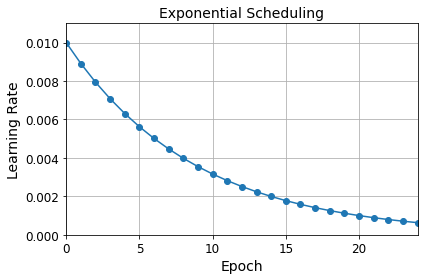

In [13]:
# exponensial scheduling per epochs
plt.plot(history_2.epoch, history_2.history["lr"],"o-")
plt.axis([0,n_epochs-1,  0,0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
save_fig("Exponential Scheduling")
plt.show()

In [14]:
# exponensial scheduling per iteration ( per batch)
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1/20)

In [15]:
K = keras.backend

class ExponensialDecay(keras.callbacks.Callback):
    def __init__(self,s=4e4):
        super().__init__()
        self.s = s
    
    def on_batch_begin(self,batch,logs=None):
        # Note : the batch argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr *0.1**(1/self.s))
    
    def on_epoch_end(self,epoch,logs=None):
        logs = logs or []
        logs["lr"] = K.get_value(self.model.optimizer.learning_rate)
        

In [16]:
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 1e-2
optimizer = keras.optimizers.Nadam(learning_rate=lr0,beta_1=0.9,beta_2=0.999)
model_3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,
                metrics = ["accuracy"])
n_epochs = 25

s = 20 * len(X_train) //32 #=> 34375 number setiap steps pada 20 epochs(batch size =32) floor
exp_decay = ExponensialDecay(s)
history_3 = model_3.fit(X_train,y_train,epochs=n_epochs,
                        validation_data = [X_valid,y_valid],
                        callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7135 - accuracy: 0.7661 - val_loss: 0.4946 - val_accuracy: 0.8270 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5042 - accuracy: 0.8285 - val_loss: 0.4673 - val_accuracy: 0.8426 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4479 - accuracy: 0.8467 - val_loss: 0.4579 - val_accuracy: 0.8514 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4009 - accuracy: 0.8622 - val_loss: 0.4658 - val_accuracy: 0.8522 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3745 - accuracy: 0.8706 - val_loss: 0.4135 - val_accuracy: 0.8672 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3445 - accuracy: 0.8807 - val_loss: 0.4020 - val_accuracy: 0.8654 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 5s

In [17]:
# visualize
n_steps = n_epochs * len(X_train) //32 # 42968
steps = np.arange(n_steps)
lrs = lr0 * 0.1 **(steps / s)

save figure  Exponential Scheduling (per batch)


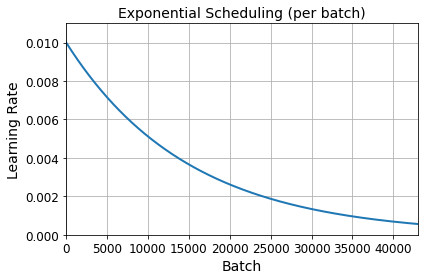

In [18]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
save_fig("Exponential Scheduling (per batch)")
plt.show()

# 3.Piecewise Constant Scheduling
Used the diferent learning on the initial learning rate and smaler learning rate then initial learning rate on many epochs 

In [19]:
def piecwise_constant_fn(epoch):
    if epoch < 5 :
        return 1e-2
    if epoch < 15:
        return 5e-3
    else:
        return 1e-3


In [20]:
def piecwise_constant_scheduling(boundaries,values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecwise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecwise_constant_fn
piecwise_constant_fn = piecwise_constant_scheduling([5,15],[1e-2,5e-3,1e-3])

In [21]:
np.array([0] + [5,15])

array([ 0,  5, 15])

In [22]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecwise_constant_fn)
model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model_4.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history_4 = model_4.fit(X_train,y_train,epochs=n_epochs,
                        validation_data = [X_valid,y_valid],
                        callbacks=[lr_scheduler])


Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7370 - accuracy: 0.7596 - val_loss: 0.7291 - val_accuracy: 0.7426 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5487 - accuracy: 0.8178 - val_loss: 0.6365 - val_accuracy: 0.8106 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4912 - accuracy: 0.8372 - val_loss: 0.5299 - val_accuracy: 0.8418 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4685 - accuracy: 0.8472 - val_loss: 0.4642 - val_accuracy: 0.8580 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4489 - accuracy: 0.8539 - val_loss: 0.4838 - val_accuracy: 0.8368 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3475 - accuracy: 0.8793 - val_loss: 0.3594 - val_accuracy: 0.8802 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 4s

save figure  Piecewise Constant Scheduling


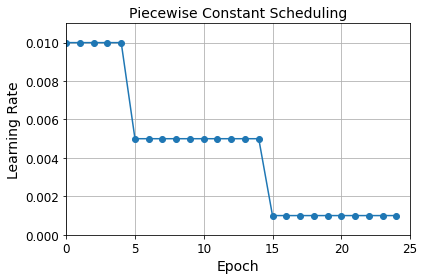

In [23]:
plt.plot(history_4.epoch,[piecwise_constant_fn(epoch) for epoch in history_4.epoch],"o-")
plt.axis([0,n_epochs,  0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
save_fig("Piecewise Constant Scheduling")
plt.show()

# 4. Performance Scheduling

In [24]:
tf.random.set_seed(42)
np.random.seed(42)

Patience :

Ketika Anda melatih sesuatu, itu dimulai dari kerugian tinggi dan selama pelatihan, kerugiannya turun dan turun (akurasi semakin tinggi).

Setelah beberapa epoch yang terbatas, loss yang cukup rendah tidak akan turun (akurasi tidak bertambah tinggi). Dalam situasi ini, tampaknya melatih lebih banyak epoch tidak berguna karena kereta Anda hampir selesai.

Sekarang pada saat ini, nilai kesabaran memberi tahu pelatih, berapa banyak epoch yang harus dilanjutkan setelah kerugian berhenti berkurang. Jika Anda tidak menetapkan nilai kesabaran, pelatihan akan berlanjut untuk semua epoch yang Anda tetapkan, bahkan jika hasil pelatihan Anda tidak membaik. Nilai ini menghemat waktu dan energi Anda (dengan mengistirahatkan GPU).

In [28]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience=5)

model_5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100,activation="selu",kernel_initializer = "lecun_normal"),
    keras.layers.Dense(10,activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=1e-2, momentum = 0.9)
model_5.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,
                metrics=["accuracy"])
n_epochs = 25
history_5=model_5.fit(X_train,y_train,epochs=n_epochs,
            validation_data = [X_valid,y_valid],
            callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5158 - accuracy: 0.8136 - val_loss: 0.4151 - val_accuracy: 0.8482 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4030 - accuracy: 0.8530 - val_loss: 0.3955 - val_accuracy: 0.8628 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8615 - val_loss: 0.3614 - val_accuracy: 0.8638 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8712 - val_loss: 0.3465 - val_accuracy: 0.8702 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3355 - accuracy: 0.8773 - val_loss: 0.3352 - val_accuracy: 0.8766 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3226 - accuracy: 0.8815 - val_loss: 0.3404 - val_accuracy: 0.8794 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 3s

save figure  Performance Scheduling


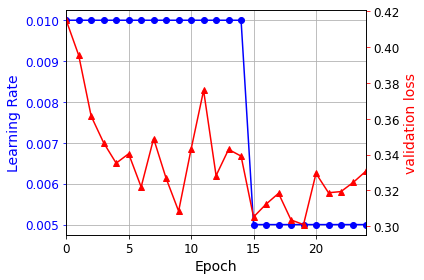

In [43]:
plt.plot(history_5.epoch, history_5.history['lr'],"-bo")
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0,n_epochs-1)

ax2 = plt.gca().twinx()
ax2.plot(history_5.epoch,history_5.history['val_loss'],'r^-')
ax2.set_ylabel("validation loss",color='r')
ax2.tick_params('y',color='r')
save_fig("Performance Scheduling")
plt.show()

# Menggunakan tf.keras.schedulers

In [45]:
# menggunakan learning rate expoentsial decay fn scheduling
model_6 =keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
n_epochs = 25
s = n_epochs * len(X_train) //32 # number of steps in 20 epochs (batchsize=32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(1e-2,s,1e-1)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model_6.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,
                metrics=['accuracy'])
history_6 = model_6.fit(X_train,y_train,epochs=n_epochs,
                        validation_data = [X_valid,y_valid])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5830 - accuracy: 0.7974 - val_loss: 0.4624 - val_accuracy: 0.8460
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4481 - accuracy: 0.8400 - val_loss: 0.4138 - val_accuracy: 0.8596
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4178 - accuracy: 0.8518 - val_loss: 0.4791 - val_accuracy: 0.8184
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3999 - accuracy: 0.8579 - val_loss: 0.3932 - val_accuracy: 0.8644
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3880 - accuracy: 0.8633 - val_loss: 0.3837 - val_accuracy: 0.8658
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8666 - val_loss: 0.3780 - val_accuracy: 0.8720
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8697 - val_loss: 0.3718 - val_accuracy:

jika menggunakan PiecewiseConstantDecay

In [47]:
batch_size=32
n_steps_per_epochs = math.ceil(len(X_train)/batch_size)

learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [5. *n_steps_per_epochs, 15. * n_steps_per_epochs],
    values=[1e-2,5e-3,1e-3]
)
model_7 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model_7.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,
                metrics=['accuracy'])
model_7.fit(X_train,y_train, epochs=n_epochs,
            validation_data = [X_valid,y_valid])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5851 - accuracy: 0.7955 - val_loss: 0.4721 - val_accuracy: 0.8370
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4488 - accuracy: 0.8388 - val_loss: 0.4093 - val_accuracy: 0.8592
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4176 - accuracy: 0.8501 - val_loss: 0.5147 - val_accuracy: 0.8032
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3994 - accuracy: 0.8575 - val_loss: 0.3844 - val_accuracy: 0.8672
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3864 - accuracy: 0.8619 - val_loss: 0.3792 - val_accuracy: 0.8652
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8706 - val_loss: 0.3666 - val_accuracy: 0.8704
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3590 - accuracy: 0.8733 - val_loss: 0.3631 - val_accuracy:

# 5.  1Cycle scheduling

In [57]:
# create class ExponensialLearningRate base scheduling classes
K = keras.backend

class ExponensialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self,batch,logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)


In [50]:
# fungsi for find learning rate per batch file
def find_learning_rate(model,X,y,epochs=1,batch_size=32,min_rate = 10**-5,max_rate = 10):
    init_weights = model.get_weights()
    iteration = math.ceil(len(X)/batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iteration)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    
    exp_lr = ExponensialLearningRate(factor)
    history_7 = model.fit(X,y,epochs=epochs,batch_size=batch_size,
                          callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate,init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [55]:
def plot_lr_vs_loss(rates,losses):
    plt.plot(rates,losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [53]:
tf.random.set_seed(42)
np.random.seed(42)

model_8 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model_8.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

430/430 [==============================] - 1s 2ms/step - loss: 142562.9375 - accuracy: 0.3010


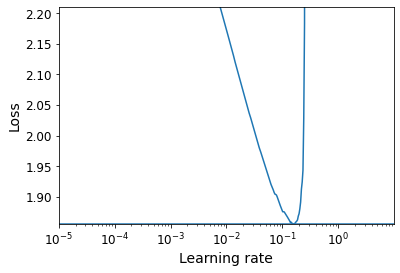

In [58]:
batch_size=128
rates,losses = find_learning_rate(model_8,X_train,y_train,epochs=1,batch_size=batch_size)
plot_lr_vs_loss(rates,losses)

In [59]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [61]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train)/batch_size) * n_epochs,max_rate=5e-2)
history_9 = model_8.fit(X_train,y_train,epochs = n_epochs,batch_size=batch_size,
                        validation_data = [X_valid,y_valid],
                        callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.8999 - accuracy: 0.7112 - val_loss: 0.6158 - val_accuracy: 0.7996
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.5613 - accuracy: 0.8109 - val_loss: 0.5025 - val_accuracy: 0.8322
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.8273 - val_loss: 0.4845 - val_accuracy: 0.8262
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.8370 - val_loss: 0.4548 - val_accuracy: 0.8394
Epoch 5/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.8424 - val_loss: 0.4344 - val_accuracy: 0.8498
Epoch 6/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8463 - val_loss: 0.4138 - val_accuracy: 0.8606
Epoch 7/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8519 - val_loss: 0.4057 - val_accuracy: 0.8596
Epoch 